In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df=pd.read_csv('/content/Website Analysis.csv')

In [156]:
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.53,0.61,4.67,0.48,1402
1,Organic Social,2024041719,208,267,132,32.10,0.63,4.30,0.49,1147
2,Direct,2024041723,188,233,115,39.94,0.61,4.59,0.49,1069
3,Organic Social,2024041718,187,256,125,32.16,0.67,4.08,0.49,1044
4,Organic Social,2024041720,175,221,112,46.92,0.64,4.53,0.51,1001


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Session primary channel group (Default channel group)  3182 non-null   object 
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   int64  
 2   Users                                                  3182 non-null   int64  
 3   Sessions                                               3182 non-null   int64  
 4   Engaged sessions                                       3182 non-null   int64  
 5   Average engagement time per session                    3182 non-null   float64
 6   Engaged sessions per user                              3182 non-null   float64
 7   Events per session                                     3182 non-null   float64
 8   Engagement rate                                 

In [169]:
df.duplicated().sum()

np.int64(0)

# Converting data type in their format

In [158]:
df.rename(columns={'Date + hour (YYYYMMDDHH)': 'Datehour','Session primary channel group (Default channel group)':'channel group'}, inplace=True)
df['Datehour'] = pd.to_datetime(df['Datehour'], format='%Y%m%d%H', errors='coerce')
df['Hour']=df['Datehour'].dt.hour

In [159]:
df.head()

,channel group,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.53,0.61,4.67,0.48,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.10,0.63,4.30,0.49,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.94,0.61,4.59,0.49,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16,0.67,4.08,0.49,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.92,0.64,4.53,0.51,1001,20


In [160]:
df.describe()

,Datehour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644717,0.606625,4.676037,0.503536,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.105000,0.560000,3.750000,0.440000,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020000,0.670000,4.410000,0.550000,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487500,0.750000,5.220000,0.630000,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200681,0.264057,2.795259,0.228294,184.440313,6.886686


# 1) What patterns or trends can you observe in website sessions and users over time?

In [161]:
sns.set_style("whitegrid")

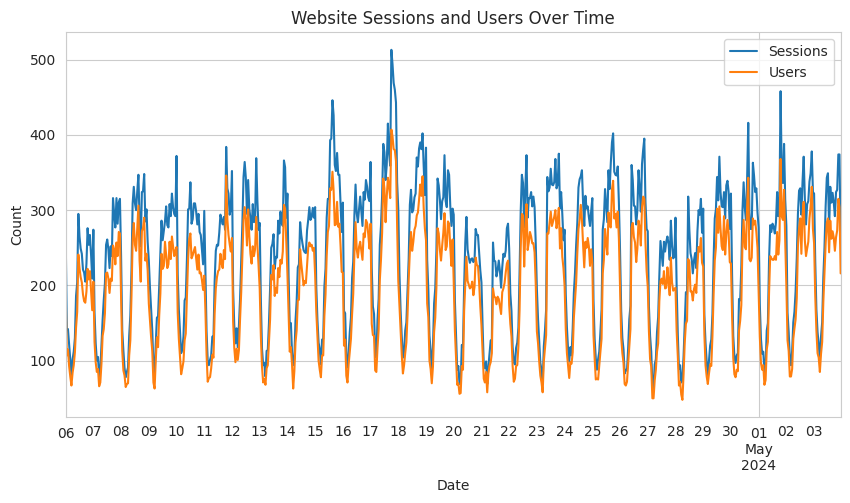

In [162]:
plt.figure(figsize=(10,5))
df.groupby('Datehour')[['Sessions','Users']].sum().plot(ax=plt.gca())
plt.title('Website Sessions and Users Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

2) Which marketing channel brought the highest number of users to the website,
and how can we use this insight to improve traffic from other sources?


/tmp/ipython-input-1363848384.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel group',y='Users',data=df,palette='Set2', order=srt_arr)


Text(0, 0.5, 'Users')

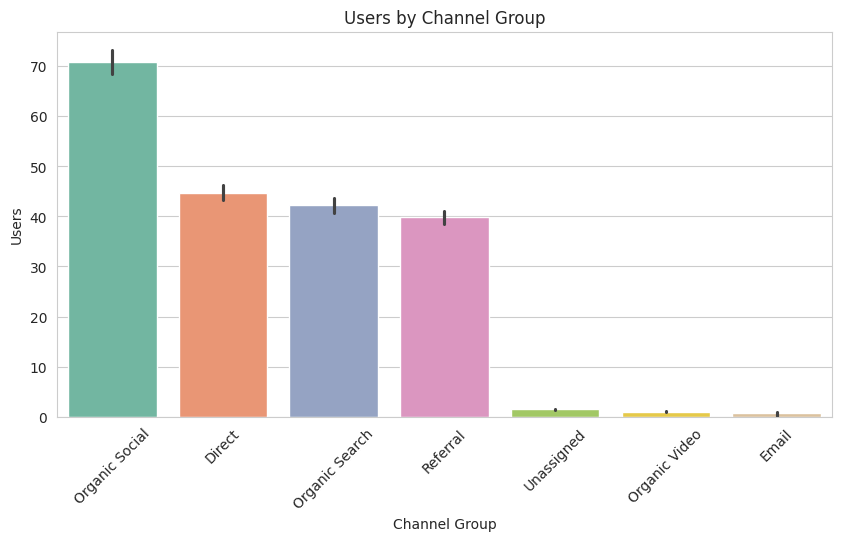

In [163]:
plt.figure(figsize=(10,5))
srt_arr= df.groupby('channel group')['Users'].sum().sort_values(ascending=False).index
sns.barplot(x='channel group',y='Users',data=df,palette='Set2', order=srt_arr)
plt.title('Users by Channel Group')
plt.xlabel('Channel Group')
plt.xticks(rotation=45)
plt.ylabel('Users')

3) Which **channel** has the highest **average engagement time**, and what does that tell us about user behavior and content effectiveness?

/tmp/ipython-input-441278341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='channel group',y='Average engagement time per session',data=df,palette='Set2',order=aaar_sor)


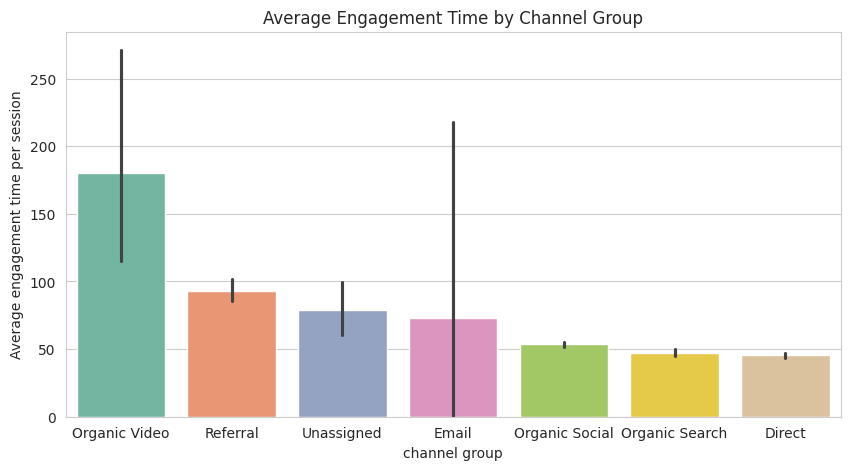

In [164]:
plt.figure(figsize=(10,5))
aaar_sor=df.groupby('channel group')['Average engagement time per session'].mean().sort_values(ascending=False).index
sns.barplot(x='channel group',y='Average engagement time per session',data=df,palette='Set2',order=aaar_sor)
plt.title('Average Engagement Time by Channel Group')
plt.show()

4) How does engagement rate vary across different traffic channels?

/tmp/ipython-input-3845980198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='channel group',y='Engagement rate',data=df,palette='Set2',order=srt_arr)


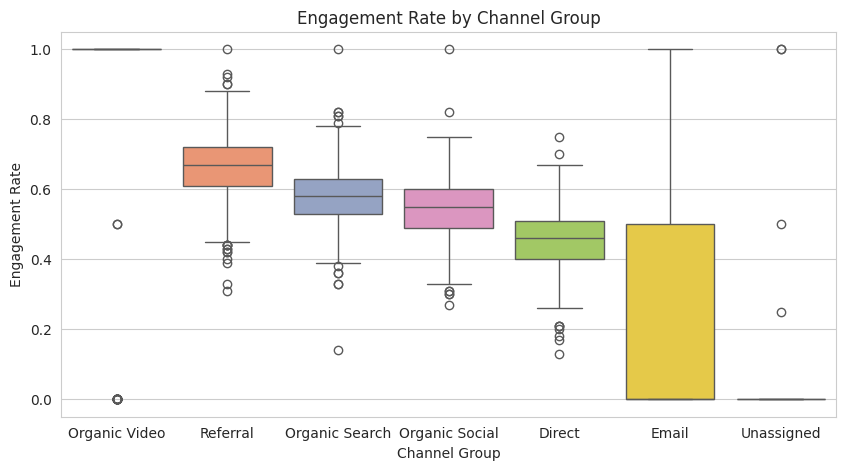

In [165]:
plt.figure(figsize=(10,5))
srt_arr= df.groupby('channel group')['Engagement rate'].mean().sort_values(ascending=False).index
sns.boxplot(x='channel group',y='Engagement rate',data=df,palette='Set2',order=srt_arr)
plt.xlabel('Channel Group')
plt.ylabel('Engagement Rate')
plt.title('Engagement Rate by Channel Group')
plt.show()

5) Which **channels** are driving more **engaged sessions** compared to non-engaged
ones, and what strategies can improve engagement in underperforming
channels?

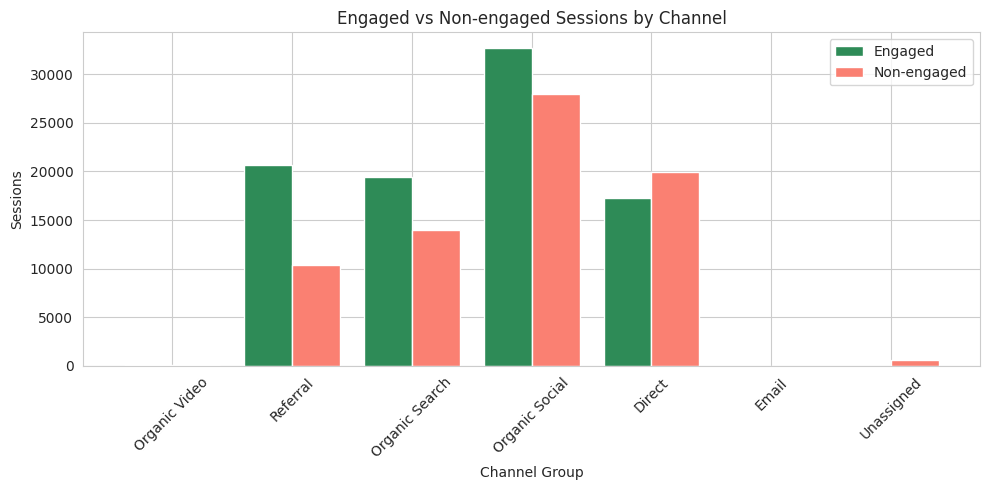

In [166]:
session_df = df.groupby('channel group')[['Sessions','Engaged sessions']].sum().reset_index()
session_df['Non-engaged'] = session_df['Sessions'] - session_df['Engaged sessions']
session_df['Engagement Rate (%)'] = (session_df['Engaged sessions'] / session_df['Sessions']) * 100
session_df = session_df.sort_values('Engagement Rate (%)', ascending=False)

plt.figure(figsize=(10,5))
x = np.arange(len(session_df))
plt.bar(x-0.2, session_df['Engaged sessions'], 0.4, label='Engaged', color='seagreen')
plt.bar(x+0.2, session_df['Non-engaged'], 0.4, label='Non-engaged', color='salmon')
plt.xticks(x, session_df['channel group'], rotation=45)
plt.title('Engaged vs Non-engaged Sessions by Channel')
plt.xlabel('Channel Group')
plt.ylabel('Sessions')
plt.legend()
plt.tight_layout()
plt.show()


 6) At what hours of the day does each channel drive the most traffic?

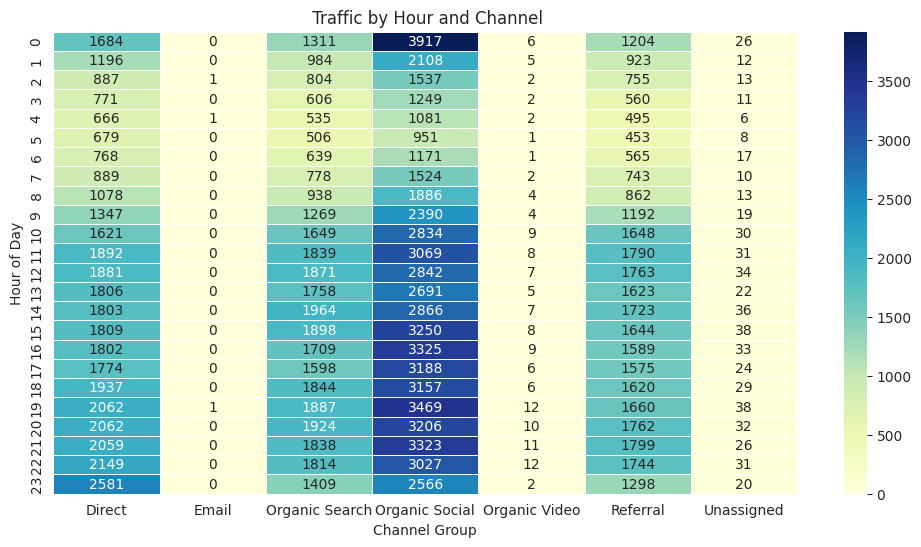

In [167]:
heatmap_data = df.groupby( ["Hour", "channel group"]) ["Sessions"].sum(). unstack(). fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths =.5, annot=True, fmt='.0f')
plt.title(" Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

 7) Is there any correlation between high traffic (sessions) and high engagement
rate over time?

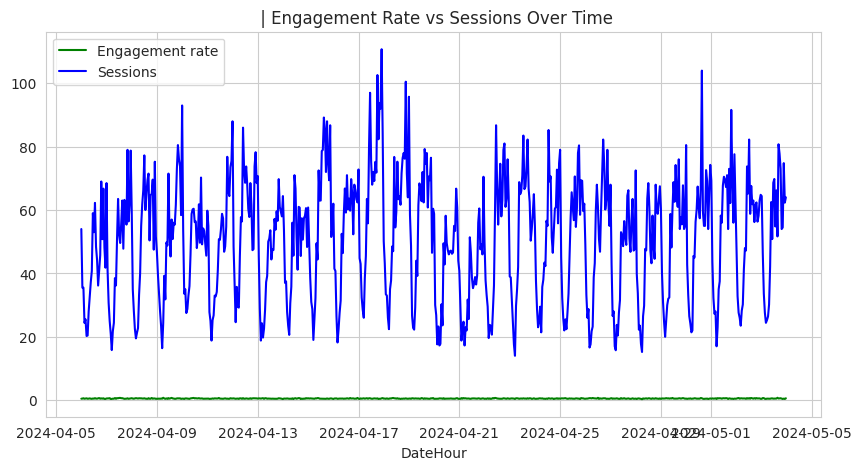

In [168]:
df_plot = df.groupby("Datehour") [["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["Datehour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["Datehour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title(" | Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend( )
plt.grid(True)
plt.show()

# Conclusion

1) **Website sessions and users over time:**
Sessions and users generally rise during peak hours or campaign periods, showing consistent daily and weekly usage patterns.

2) **Highest user-driving channel:**
The channel with the most users (e.g., Organic Search or Direct) is the key traffic source; focusing similar strategies on weaker channels can boost their performance.

3) **Channel with highest average engagement time:**
Channels with longer engagement time indicate high-quality, relevant content and more interested visitors — content from these channels should guide future strategy.

4) **Engagement rate across channels:**
Engagement rate varies widely; some channels attract more active users, while others bring more casual or one-time visitors.

5) **Engaged vs non-engaged sessions:**
A few channels drive most engaged sessions; underperforming ones need better targeting, more personalized content, and optimized landing experiences.

6) **Traffic by hour of day:**
Traffic peaks during specific hours (often mid-day or evening), suggesting when audiences are most active — ideal times for campaign launches or updates.

7) **Correlation between traffic and engagement rate:**
There’s usually a weak to moderate positive correlation — higher traffic can increase engagement, but quality of content and user experience matter more.
